In [1]:
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
from sklearn.utils import shuffle
from scapy.all import *
from apyori import apriori
import numpy as np
import pandas as pd
import pickle
import func
from sklearn.model_selection import StratifiedKFold

In [2]:
testList=[] #测试集
trainList=[] #训练集
#表示在阿里模型需要使用的测试集中导入了标签为1（代表阿里）的样本
func.read_heartbit_test('C:\\Users\\23560\\Desktop\\心跳流分类器\\STUDY\\srtpdataf3\\other4',testList,0,0)
print(testList)

[[0.0, 0.0, 0.0, 0.3613861386138614, 0.33663366336633666, 0.2524752475247525, 0.0, 0.0, 0.0, 0.21782178217821782, 0.0, 60, 0, 28.626267480818115, 9, 0], [0.0, 0.0, 0.0, 0.3706896551724138, 0.4267241379310345, 0.3275862068965517, 0.0, 0.0, 0.0, 0.27155172413793105, 0.0, 60, 0, 28.344638811352254, 9, 0], [0.0, 0.0, 0.0, 0.4225, 0.385, 0.3175, 0.0, 0.0, 0.0, 0.2725, 0.0, 60, 0, 28.31942796032434, 9, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3, 0, 1.5, 120, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3, 0, 1.5, 120, 0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3, 0, 1.5, 120, 0], [0.0, 0.0, 0.0, 0.3902439024390244, 0.3597560975609756, 0.3231707317073171, 0.0, 0.0, 0.0, 0.2621951219512195, 0.0, 60, 0, 28.512536771096695, 9, 0], [0.0, 0.0, 0.0, 0.3876500857632933, 0.38078902229845624, 0.31046312178387653, 0.0, 0.0, 0.0, 0.2607204116638079, 0.0, 60, 0, 28.379808527628935, 6, 0], [0.0, 0.0, 0.0, 0.38571428571428573, 0.2571428571428571, 0.2714285

平均模型精确度: 0.9988304093567251
平均模型准确率: 0.9990291262135923
平均模型召回率: 1.0


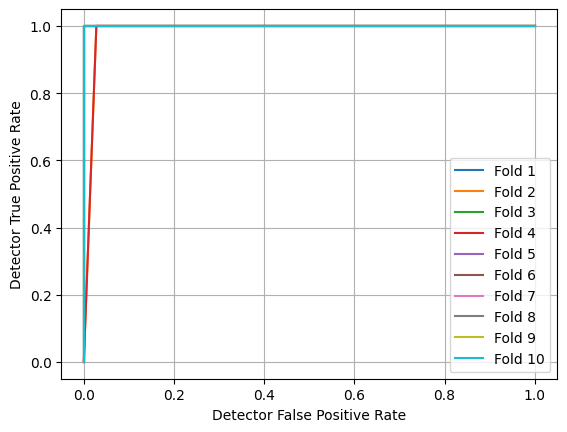

In [3]:
data = np.array(testList)
df = pd.DataFrame(data)
# 将DataFrame保存为csv文件
df.to_csv('./data.csv', index=False)
df = pd.read_csv('./data.csv')
col=df.shape[1]
# 获取特征和标签
X = df.iloc[:, :(col-1)]
y = df.iloc[:, -1]
# 创建StratifiedKFold对象
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=713)
#md=LogisticRegression()
#md=svm.SVC(kernel='poly')
#md=RandomForestClassifier(64)
#md=DecisionTreeClassifier()
md=KNeighborsClassifier(n_neighbors=5)
fold_count=0
p = np.array([])
a = np.array([])
r = np.array([])
# 进行分层交叉验证
for train_index, test_index in skf.split(X, y):
    fold_count+=1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # 在这里进行模型训练和评估
    md.fit(X_train,y_train)
    y_pred =md.predict(X_test)
    p=np.append(p,precision_score(y_test,y_pred))
    a=np.append(a,accuracy_score(y_test,y_pred))
    r=np.append(r,recall_score(y_test, y_pred, pos_label=1))
    #画图
    scores = md.predict_proba(X_test)[:,-1]
    fpr,tpr,threshold = metrics.roc_curve(y_test,scores)
    pyplot.plot(fpr,tpr,label="Fold %s"%(fold_count))
pyplot.xlabel('Detector False Positive Rate')
pyplot.ylabel('Detector True Positive Rate')
pyplot.legend()
pyplot.grid()
print("平均模型精确度:", p.mean())
print("平均模型准确率:", a.mean())
print("平均模型召回率:",r.mean())
